## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DS_Project/Data_Set/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Soal

### Categorical Data Encoding

pada kolom PaymentMethod, InternetService, OnlineSecurity, Contract <br><br>

lakukan Categorical Data Encoding, dari 4 kolom tersebut wajib 1 kolom menggunakan frequency encoding, 1 kolom mean encoding, dan sisa nya bebas.<br><br>

kemudia setelah dilakukan proses Categorical Data Encoding, gabungkan dengan data awal

####Frequency Encoding

In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
fq_PM=data['PaymentMethod'].value_counts().reset_index()
fq_PM.rename(columns={"index":"PaymentMethod", "PaymentMethod":"fq_PaymentMethod"},inplace=True)
fq_PM['pct_PaymentMethod'] = round((fq_PM['fq_PaymentMethod']/fq_PM['fq_PaymentMethod'].sum())*100,2)
fq_PM

,PaymentMethod,fq_PaymentMethod,pct_PaymentMethod
0,Electronic check,2365,33.58
1,Mailed check,1612,22.89
2,Bank transfer (automatic),1544,21.92
3,Credit card (automatic),1522,21.61


In [ ]:
data =data.merge(fq_PM[['PaymentMethod','pct_PaymentMethod']],on='PaymentMethod', how='inner')
data[['PaymentMethod','pct_PaymentMethod']]

,PaymentMethod,pct_PaymentMethod
0,Electronic check,33.58
1,Electronic check,33.58
2,Electronic check,33.58
3,Electronic check,33.58
4,Electronic check,33.58
...,...,...
7038,Credit card (automatic),21.61
7039,Credit card (automatic),21.61
7040,Credit card (automatic),21.61
7041,Credit card (automatic),21.61


####Ordinal Encoding
Kenapa dua-duanya *ordinal encoding?* karena menurut saya, keduanya memeliki katagori yang valuenya memiliki bobot berbeda. Misalnya, InternetService dengan ```No< DSL < Fiber Optic```

In [ ]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
map_OnlineSecurity={'Yes':3,
                    'No':2,
                    "No internet service":1}
data['OnlineSecurity_cat']=data['OnlineSecurity'].map(map_OnlineSecurity)
data[['OnlineSecurity','OnlineSecurity_cat']].head()

,OnlineSecurity,OnlineSecurity_cat
0,No,2
1,No,2
2,No,2
3,No,2
4,Yes,3


In [ ]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
map_InternetService={'Fiber optic':3,
                    'DSL':2,
                    "No":1}
data['InternetService_cat']=data['InternetService'].map(map_InternetService)
data[['InternetService','InternetService_cat']].head()

,InternetService,InternetService_cat
0,DSL,2
1,Fiber optic,3
2,Fiber optic,3
3,Fiber optic,3
4,Fiber optic,3



####Mean Encoding








In [ ]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
fq_c= data['Contract'].value_counts().reset_index()
fq_c.rename(columns={"index": "Contract", "Contract": "fq_Contract"}, inplace = True)
fq_c

,Contract,fq_Contract
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


In [ ]:
#Jumlahkan Value target berdasarkan category
sum_c = data.groupby(['Contract']).agg({'tenure':sum}).reset_index()
sum_c.rename(columns={"tenure": "Sum_Contract"}, inplace = True)
sum_c

,Contract,Sum_Contract
0,Month-to-month,69892
1,One year,61932
2,Two year,96166


In [ ]:
#Hitung mean encoding untuk Contract
mean_c = fq_c.merge(sum_c, on='Contract', how='inner')
mean_c['mean_c_contract']=mean_c['Sum_Contract']/mean_c['fq_Contract']
mean_c

,Contract,fq_Contract,Sum_Contract,mean_c_contract
0,Month-to-month,3875,69892,18.036645
1,Two year,1695,96166,56.735103
2,One year,1473,61932,42.044807


In [ ]:
data = data.merge(mean_c[['Contract','mean_c_contract']], on='Contract', how='inner')
data[['Contract','mean_c_contract']]

,Contract,mean_c_contract
0,Month-to-month,18.036645
1,Month-to-month,18.036645
2,Month-to-month,18.036645
3,Month-to-month,18.036645
4,Month-to-month,18.036645
...,...,...
7038,Two year,56.735103
7039,Two year,56.735103
7040,Two year,56.735103
7041,Two year,56.735103


### Outlier Handling

In [ ]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Bagaimana handling outlier pada kolom total_bill??

In [ ]:
data['total_bill'].describe() 

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

<function matplotlib.pyplot.tight_layout>

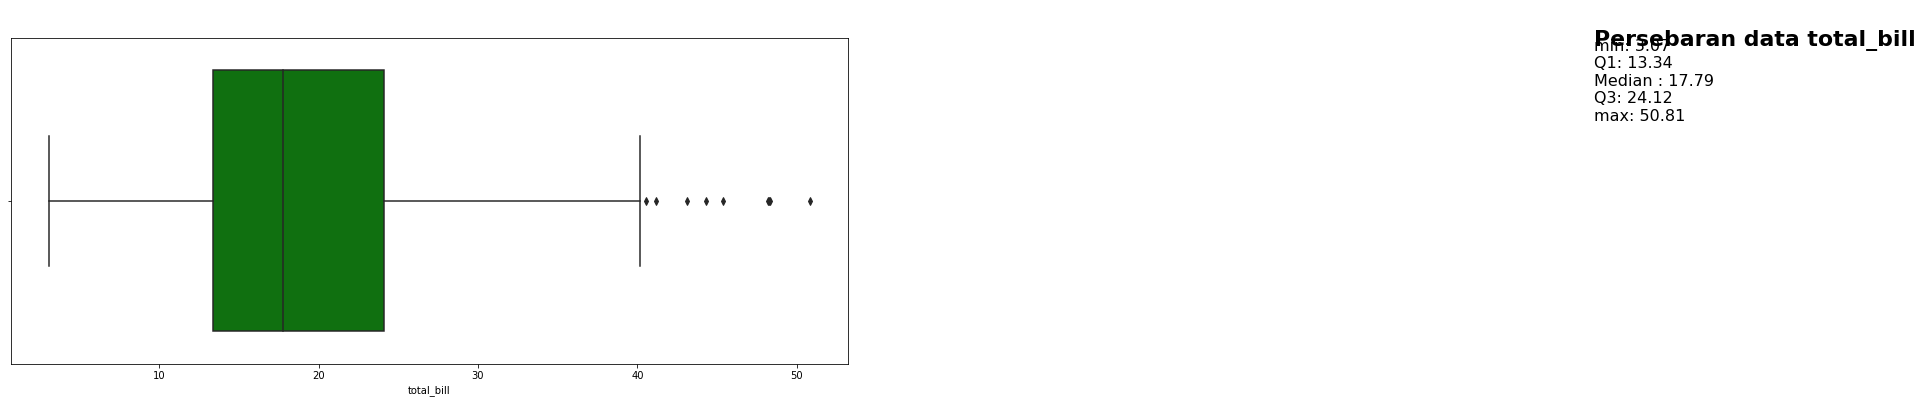

In [ ]:
#visualize the data 

fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data['total_bill'],color='green',orient='h')
title = '''
Persebaran data total_bill
'''
ax.text(100,-0.4,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')

text = '''
min: 3.07
Q1: 13.34
Median : 17.79
Q3: 24.12
max: 50.81

'''
ax.text(100,-0.14,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')

plt.tight_layout    

####Handling outlier with Z-score

In [ ]:
from scipy import stats

In [ ]:
print(data.shape)
data.head(3)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [ ]:
print('Jumlah baris sebelum handling outlier pada kolom total_bill:', len(data))
data['total_bill_zscore'] = abs(stats.zscore(data['total_bill']))
data = data[data['total_bill_zscore'] < 2]
print(f'Jumlah baris setelah memfilter outlier:', len(data))
data.head()

Jumlah baris sebelum handling outlier pada kolom total_bill: 240
Jumlah baris setelah memfilter outlier: 229


,total_bill,tip,sex,smoker,day,time,size,total_bill_zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,0.284729
1,10.34,1.66,Male,No,Sun,Dinner,3,1.104123
2,21.01,3.50,Male,No,Sun,Dinner,3,0.210604
3,23.68,3.31,Male,No,Sun,Dinner,2,0.539593
4,24.59,3.61,Female,No,Sun,Dinner,4,0.651721


<function matplotlib.pyplot.tight_layout>

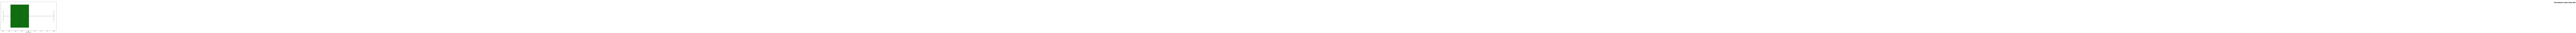

In [ ]:
#visualize the data 

fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data['total_bill_zscore'],color='green',orient='h')
title = '''
Persebaran data total_bill
'''
ax.text(100,-0.4,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')

plt.tight_layout    

Yuhuu! look, clean af!! ^^